In [1]:
from tensorflow.keras.datasets import imdb

#문제를 간단히 하기위해 num_words를 500으로 제한하여 사용되는 단어를 500개로 제한한다.
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(train_input[0])
#샘플의 시작은 1
#각 정수는 각 단어를 의미한다.
#2는 load_data함수에서 지정한 500개 이외의 단어를 의미한다.

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [6]:
import numpy as np
#len(배열)은 배열의 길이를 구해주는 함수이다.
#[len(x) for x in train_input] 구문은 train_input을 순회하면서 각 원소 배열의 길이를 1차원 배열로 저장해 반환한다.
lengths = np.array([len(x) for x in train_input])
#np.mean함수는 주어진 넘파이 배열의 평균값을
#np.median함수는 주어진 넘파이 배열의 중간값을 구해준다.
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


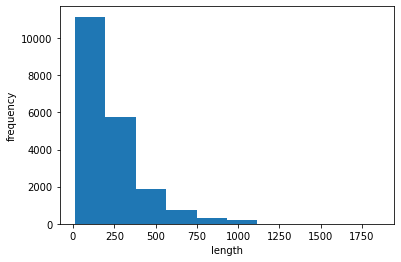

In [7]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

**시퀀스 패딩**

문장의 최대 길이(최대 단어 개수)를 정하고, 길이보다 긴 문장을 자르며, 길이보다 짧은 문장은 빈 공간에 0 값을 넣어주는 것을 **시퀀스 패딩**이라고 한다.

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#시퀀스 패딩은 tensorflow.keras.preprocessing.sequence밑에 있는 pad_sequences클래스를 사용한다.
#maxlen:문장의 최대 길이를 정한다.
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [9]:
#검증세트도 패딩
val_seq = pad_sequences(val_input, maxlen=100)

In [10]:
print(train_seq[0])
print("")
print(train_input[0][-10:])
#위쪽은 패딩한 데이터 전체를, 아래쪽은 패딩전 데이터의 뒤쪽 10개의 원소를 나타낸것이다
#패딩한 데이터의 뒤쪽부분과 패딩전 데이터 뒤쪽 10개의 원소가 모두 일치하는 것으로 보아
#pad_sequences클래스는 maxlen초과하는 데이터의 앞쪽부분을 잘라 패딩하는 것을 알 수 있다.

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [11]:
print(train_seq[5])
#아래는 패딩된 데이터 전체를 나타낸것이다.
#보는 바와 같이 데이터 pad_sequences클래스는 maxlen보다 짧은 데이터는 앞쪽부분에 0으로 패딩하는 것을 알 수 있다.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


# **순환 신경망**

In [12]:
from tensorflow import keras

model = keras.Sequential()
#RNN층(순환층)다음에 밀집층을 놓을 경우 CNN과 달리 Flatten층으로 출력을 펼칠 필요가 없다.
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
#긍정/부정의 이진분류이므로 출력층으로 뉴런 1개의 sigmoid함수를 사용한다.
model.add(keras.layers.Dense(1, activation='sigmoid'))

**원-핫 인코딩**

각각의 정수를 카테고리로 생각하여 0과 1로 이루어진 2차원 배열로 원소 하나하나를 원-핫 배열로 인코딩.
각 정수사이의 상관관계(크기 등)을 없앨 수 있다.

In [13]:
#keras.utils하위의 to_categorical클래스를 사용하여 원-핫 인코딩을 한다.
train_oh = keras.utils.to_categorical(train_seq)
print(train_seq.shape)
print("")
print(train_oh.shape)
#아래와 같이 길이 100의 문장 20000개가 각각 500의 카테고리를 지닌 원-핫 배열로 인코딩 된것을 볼 수 있다.

(20000, 100)

(20000, 100, 500)


In [14]:
#검증세트도 원-핫 인코딩을 해준다.
val_oh = keras.utils.to_categorical(val_seq)

In [15]:
model.summary()
#500개의 원-핫 인코딩이 8개의 뉴런과 완전연결되므로 500*8개의 가중치
#8개의 뉴런의 출력이 모든 뉴런에 완전연결되어 순환되므로 8*8개의 가중치
#8개의 뉴런 각각의 절편 8개
#따라서 순환층 simpleRNN의 총 파라미터 개수는 4072개가 된다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


**신경망 훈련**

In [16]:
#RMSprop옵티마이저 사용
#1e-4는 1*10^(-4)를 의미한다.
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
#이진분류이므로 'binary_crossentropy'손실함수를 사용
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 70ms/step - loss: 0.7008 - accuracy: 0.5014 - val_loss: 0.6982 - val_accuracy: 0.5068
Epoch 2/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6981 - accuracy: 0.4973 - val_loss: 0.6962 - val_accuracy: 0.5086
Epoch 3/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6942 - accuracy: 0.5138 - val_loss: 0.6948 - val_accuracy: 0.5184
Epoch 4/100
313/313 [==============================] - 21s 69ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6937 - val_accuracy: 0.5164
Epoch 5/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6901 - accuracy: 0.5315 - val_loss: 0.6927 - val_accuracy: 0.5208
Epoch 6/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6890 - accuracy: 0.5382 - val_loss: 0.6917 - val_accuracy: 0.5242
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6874 - accuracy: 0.5494 - val_loss: 0.6909 - val_ac

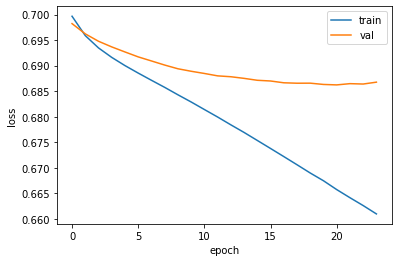

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**임베딩**

In [28]:
model2 = keras.Sequential()
#500개의 카테고리를 16개로 줄여주는 임베딩층을 추가
#input_length:입력으로 오는 토큰 개수를 받는다.
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()
#16개의 입력과 8개의 뉴런이 완전연결되므로 16*8개의 가중치
#8개의 출력값이 각각 8개의 뉴런과 완전연결되므로 8*8개의 가중치
#8개의 출력층 뉴런 각각이 가지는 8개의 절편
#따라서 SimpleRNN층은 총 200개의 파라미터를 가진다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 77ms/step - loss: 0.6883 - accuracy: 0.5362 - val_loss: 0.6132 - val_accuracy: 0.6738
Epoch 2/100
313/313 [==============================] - 24s 75ms/step - loss: 0.5913 - accuracy: 0.6999 - val_loss: 0.5511 - val_accuracy: 0.7402
Epoch 3/100
313/313 [==============================] - 23s 75ms/step - loss: 0.5380 - accuracy: 0.7441 - val_loss: 0.5207 - val_accuracy: 0.7624
Epoch 4/100
313/313 [==============================] - 24s 76ms/step - loss: 0.5082 - accuracy: 0.7689 - val_loss: 0.5072 - val_accuracy: 0.7646
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.4960 - accuracy: 0.7754 - val_loss: 0.4970 - val_accuracy: 0.7692
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.4833 - accuracy: 0.7807 - val_loss: 0.5026 - val_accuracy: 0.7624
Epoch 7/100
313/313 [==============================] - 23s 75ms/step - loss: 0.4653 - accuracy: 0.7928 - val_loss: 0.4822 - val_ac

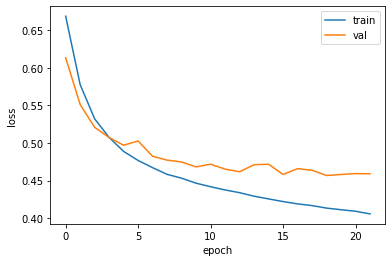

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#임베딩 이후 과대적합이 많이 해소된 것을 볼 수 있다.

# **원-핫 인코딩 이해하기**

In [18]:
#0,1,2,3,4,5,6의 총 7개의 카테고리를 갖는 3*3배열 생성
strs = [[1,2,3],[1,3,6],[5,0,4]]
strs_oh = keras.utils.to_categorical(strs)
print(strs_oh.shape)
#3*3배열을 7개의 카테고리로 원-핫 인코딩

(3, 3, 7)


In [19]:
print(strs_oh[0][0])#strs[0][0](=1)의 인코딩 배열

[0. 1. 0. 0. 0. 0. 0.]


In [20]:
print(strs_oh[0][1])#strs[0][1](=2)의 인코딩 배열

[0. 0. 1. 0. 0. 0. 0.]


In [21]:
print(strs_oh[0][2])#strs[0][2](=3)의 인코딩 배열

[0. 0. 0. 1. 0. 0. 0.]


In [22]:
print(strs_oh[1][0])#strs[1][0](=1)의 인코딩 배열

[0. 1. 0. 0. 0. 0. 0.]


In [23]:
print(strs_oh[1][1])#strs[1][1](=3)의 인코딩 배열

[0. 0. 0. 1. 0. 0. 0.]


In [24]:
print(strs_oh[1][2])#strs[1][2](=6)의 인코딩 배열

[0. 0. 0. 0. 0. 0. 1.]


In [25]:
print(strs_oh[2][0])#strs[2][0](=5)의 인코딩 배열

[0. 0. 0. 0. 0. 1. 0.]


In [26]:
print(strs_oh[2][1])#strs[2][1](=0)의 인코딩 배열

[1. 0. 0. 0. 0. 0. 0.]


In [27]:
print(strs_oh[2][2])#strs[2][2](=4)의 인코딩 배열

[0. 0. 0. 0. 1. 0. 0.]
